In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('../train.csv')
df.sample(5)

,id,source,sentence_1,sentence_2,label,binary-label
907,boostcamp-sts-v1-train-907,nsmc-sampled,"가족의 의미, 부성애, 모성애","어릴때 보고 정말이지 묵직한 부성애와 사랑하는 사람과의 슬픔, 인생의 복잡함을 느꼈다.",1.2,0.0
34,boostcamp-sts-v1-train-034,nsmc-rtt,전설따라 삼천리(삼만리인가?)에 의하면 이 영화가 꽤 괜찮다고 할뿐 아니라 내가 좋...,전설에 따르면 삼천리(삼천리?)에 따르면 이 영화는 꽤 괜찮을 뿐만 아니라 내가 제...,4.0,1.0
5661,boostcamp-sts-v1-train-5661,slack-rtt,아니 당근이 진짜 당근일줄은ㅋㅋ,아뇨 당근이 진짜 당근은 아닌 것 같아요 ㅎㅎ,1.2,0.0
6409,boostcamp-sts-v1-train-6409,petition-sampled,최저임금에 대한 의견,최저임금에 대한 재고 부탁합니다,2.8,1.0
2158,boostcamp-sts-v1-train-2158,petition-sampled,택배 화물차 보복신고,대형 화물차 가변축 압 조절...,0.2,0.0


In [5]:
import json

import pandas as pd
from matplotlib import pyplot as plt

from tqdm import tqdm
from transformers import AutoTokenizer

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [10]:
df = pd.read_csv('../train.csv')

In [14]:
# 입력의 두 문장을 토크나이징하여 길이와 unk 토큰의 개수를 분석합니다
def tokenizing(df):
    tokenizer = AutoTokenizer.from_pretrained('klue/roberta-large')

    sentence1_len = []
    sentence2_len = []
    sentence1_unk = []
    sentence2_unk = []
    for i, item in df.iterrows():
        sentence1 = tokenizer(item['sentence_1'])['input_ids']
        sentence2 = tokenizer(item['sentence_2'])['input_ids']

        sentence1_len.append(len(sentence1))
        sentence2_len.append(len(sentence2))

        sentence1_unk.append(sentence1.count(tokenizer.unk_token_id))
        sentence2_unk.append(sentence2.count(tokenizer.unk_token_id))

    tokenized_df = pd.DataFrame([sentence1_len, sentence2_len, sentence1_unk, sentence2_unk]).transpose()
    tokenized_df.columns = ['1_len', '2_len', '1_unk', '2_unk']
    print(tokenized_df.describe())

In [15]:
tokenizing(df)

             1_len        2_len        1_unk        2_unk
count  9324.000000  9324.000000  9324.000000  9324.000000
mean     14.848241    14.958387     0.028958     0.022308
std       7.771558     7.201888     0.179438     0.156163
min       3.000000     3.000000     0.000000     0.000000
25%      10.000000    10.000000     0.000000     0.000000
50%      13.000000    13.000000     0.000000     0.000000
75%      17.000000    18.000000     0.000000     0.000000
max      88.000000    84.000000     4.000000     2.000000


In [16]:
# label의 분포를 box plot으로 그립니다
def draw_box_plot(df):
    label_list = [row['label'] for i, row in df.iterrows()]

    plt.boxplot(label_list)
    plt.title("Boxplot for target label")
    plt.show()

In [30]:
# pandas 데이터를 가지고 그래프를 그리는 함수입니다
def draw_graph(df):
    source_binary = {source:[0, 0] for source in sorted(df['source'].unique())}
    # print(source_binary)
    # print(df.sample(10))
    # for i, item in df.iterrows():
    #     source_binary[item['source']][item['binary-label']] += 1
    # source_binary_df = pd.DataFrame(source_binary).transpose()

    # source의 분포
    df['source'].value_counts().plot(kind='bar', rot=20, figsize=(8, 6))
    plt.show()
    # # source별 binary label의 분포
    # source_binary_df.plot(kind='bar', rot=20, figsize=(8, 6))
    plt.show()
    # label의 분포
    df['label'].plot(kind='hist', rot=20, figsize=(8, 6))
    plt.show()
    # binary label의 분포
    df['binary-label'].value_counts().plot(kind='bar', rot=20, figsize=(8, 6))
    plt.show()

train


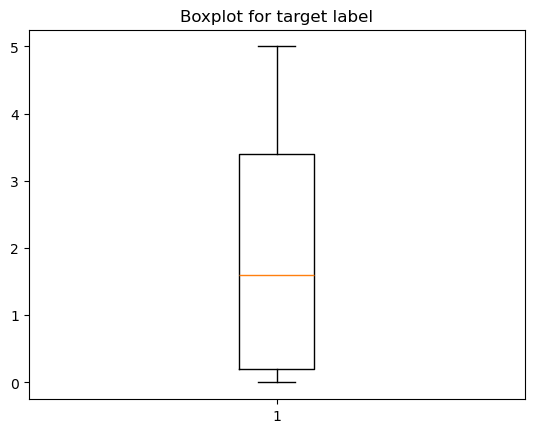

In [31]:
# label 분포 확인
print("train")
draw_box_plot(df)

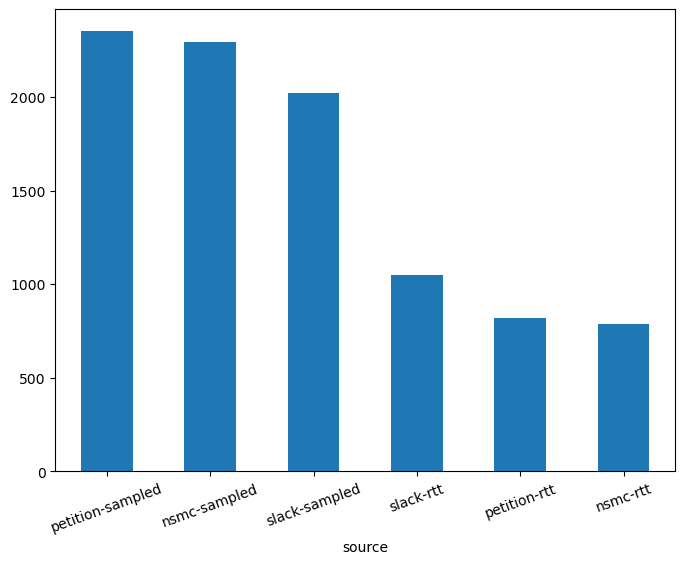

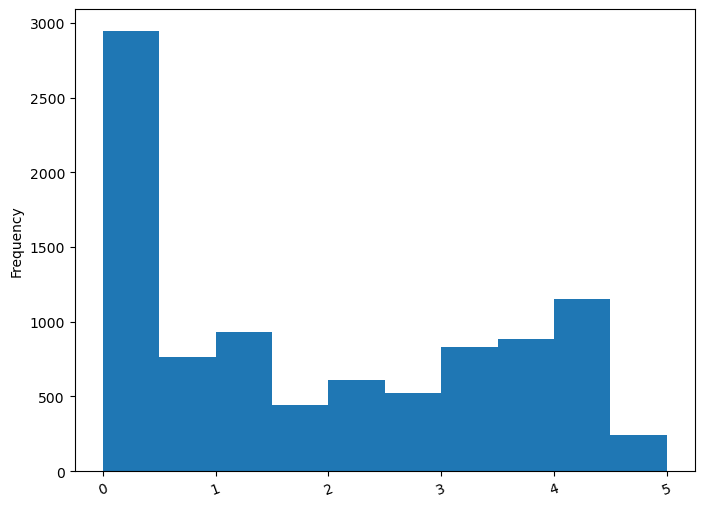

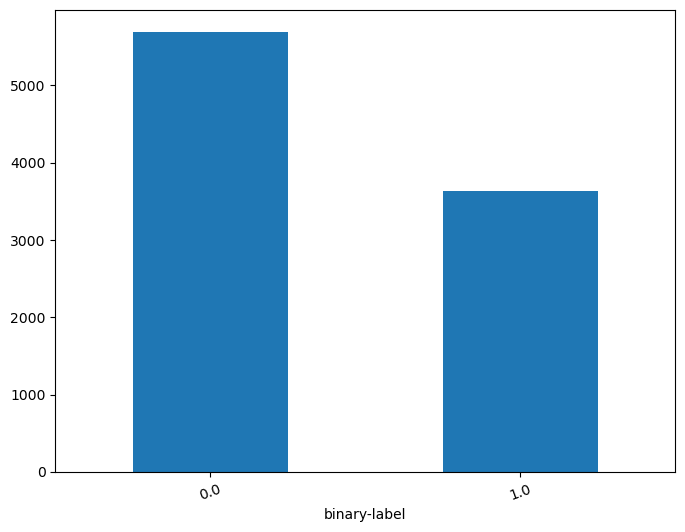

In [32]:
draw_graph(df)

In [37]:
import random
import pickle
import re

In [296]:
wordnet = {}
with open("../wordnet.pickle", "rb") as f:
	wordnet = pickle.load(f)

In [297]:
# 한글만 남기고 나머지는 삭제
def get_only_hangul(line):
	parseText= re.compile('/ ^[ㄱ-ㅎㅏ-ㅣ가-힣]*$/').sub('',line)

	return parseText

In [321]:
def synonym_replacement(words, n):
	new_words = words.copy()
	random_word_list = list(set([word for word in words]))
	print(random_word_list)
	random.shuffle(random_word_list)
	num_replaced = 0
	for random_word in random_word_list:
		synonyms = get_synonyms(random_word)
		if len(synonyms) >= 1:
			synonym = random.choice(list(synonyms))
			new_words = [synonym if word == random_word else word for word in new_words]
			num_replaced += 1
		if num_replaced >= n:
			break

	if len(new_words) != 0:
		sentence = ' '.join(new_words)
		new_words = sentence.split(" ")

	else:
		new_words = ""

	return new_words

In [322]:
synonym_replacement(["오피스에", "계신분들이", "회의가", "아직", "안끝나서", "6시쯤", "출발할", "수", "있을", "것", "같습니다"], 5)

['출발할', '있을', '회의가', '아직', '수', '것', '6시쯤', '계신분들이', '안끝나서', '오피스에', '같습니다']


['오피스에', '계신분들이', '회의가', '아직', '안끝나서', '6시쯤', '출발할', '수', '있을', '것', '같습니다']

In [323]:
def get_synonyms(word):
	synomyms = []
	try:
		for syn in wordnet[word]:
			for s in syn:
				synomyms.append(s)
	except:
		pass

	return synomyms

In [324]:
def random_deletion(words, p):
	if len(words) == 1:
		return words

	new_words = []
	for word in words:
		r = random.uniform(0, 1)
		if r > p:
			new_words.append(word)

	if len(new_words) == 0:
		rand_int = random.randint(0, len(words)-1)
		return [words[rand_int]]

	return new_words

In [325]:
def random_swap(words, n):
	new_words = words.copy()
	for _ in range(n):
		new_words = swap_word(new_words)

	return new_words

In [326]:
def swap_word(new_words):
	random_idx_1 = random.randint(0, len(new_words)-1)
	random_idx_2 = random_idx_1
	counter = 0

	while random_idx_2 == random_idx_1:
		random_idx_2 = random.randint(0, len(new_words)-1)
		counter += 1
		if counter > 3:
			return new_words

	new_words[random_idx_1], new_words[random_idx_2] = new_words[random_idx_2], new_words[random_idx_1]
	return new_words

In [327]:
def random_insertion(words, n):
	new_words = words.copy()
	for _ in range(n):
		add_word(new_words)

	return new_words

In [328]:
def add_word(new_words):
	synonyms = []
	counter = 0
	while len(synonyms) < 1:
		if len(new_words) >= 1:
			random_word = new_words[random.randint(0, len(new_words)-1)]
			synonyms = get_synonyms(random_word)
			counter += 1
		else:
			random_word = ""

		if counter >= 10:
			return

	random_synonym = synonyms[0]
	random_idx = random.randint(0, len(new_words)-1)
	new_words.insert(random_idx, random_synonym)

In [ ]:
# 문장을 형태소로 나눈다.


In [329]:
def SR(sentence, alpha_sr=0.1):
	sentence = get_only_hangul(sentence)
	words = sentence.split(' ')
	words = [word for word in words if word is not ""]
	num_words = len(words)

	augmented_sentences = []
	n_sr = max(1, int(alpha_sr*num_words))

	a_words = synonym_replacement(words, n_sr)
	augmented_sentences.append(' '.join(a_words))

	augmented_sentences = [get_only_hangul(sentence) for sentence in augmented_sentences]
	random.shuffle(augmented_sentences)

	return augmented_sentences


def EDA(sentence, alpha_sr=0.1, alpha_ri=0.1, alpha_rs=0.1, p_rd=0.1, num_aug=9):
	sentence = get_only_hangul(sentence)
	words = sentence.split(' ')
	words = [word for word in words if word is not ""]
	num_words = len(words)

	augmented_sentences = []
	num_new_per_technique = int(num_aug/4) + 1

	n_sr = max(1, int(alpha_sr*num_words))
	n_ri = max(1, int(alpha_ri*num_words))
	n_rs = max(1, int(alpha_rs*num_words))

	# sr
	for _ in range(num_new_per_technique):
		a_words = synonym_replacement(words, n_sr)
		augmented_sentences.append(' '.join(a_words))

	# ri
	for _ in range(num_new_per_technique):
		a_words = random_insertion(words, n_ri)
		augmented_sentences.append(' '.join(a_words))

	# rs
	for _ in range(num_new_per_technique):
		a_words = random_swap(words, n_rs)
		augmented_sentences.append(" ".join(a_words))

	# rd
	for _ in range(num_new_per_technique):
		a_words = random_deletion(words, p_rd)
		augmented_sentences.append(" ".join(a_words))

	augmented_sentences = [get_only_hangul(sentence) for sentence in augmented_sentences]
	random.shuffle(augmented_sentences)

	if num_aug >= 1:
		augmented_sentences = augmented_sentences[:num_aug]
	else:
		keep_prob = num_aug / len(augmented_sentences)
		augmented_sentences = [s for s in augmented_sentences if random.uniform(0, 1) < keep_prob]

	augmented_sentences.append(sentence)

	return augmented_sentences

<>:4: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:22: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:4: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:22: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/var/folders/q2/pb2t6n9s2j39c0blxxp0tq8c0000gn/T/ipykernel_84382/599012282.py:4: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  words = [word for word in words if word is not ""]
/var/folders/q2/pb2t6n9s2j39c0blxxp0tq8c0000gn/T/ipykernel_84382/599012282.py:22: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  words = [word for word in words if word is not ""]


In [330]:
def RI(sentence, alpha_ri=0.1):
	sentence = get_only_hangul(sentence)
	words = sentence.split(' ')
	words = [word for word in words if word is not ""]
	num_words = len(words)

	augmented_sentences = []
	n_ri = max(1, int(alpha_ri*num_words))

	a_words = random_insertion(words, n_ri)
	augmented_sentences.append(' '.join(a_words))

	augmented_sentences = [get_only_hangul(sentence) for sentence in augmented_sentences]
	random.shuffle(augmented_sentences)

	return augmented_sentences

<>:4: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:4: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/var/folders/q2/pb2t6n9s2j39c0blxxp0tq8c0000gn/T/ipykernel_84382/104969733.py:4: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  words = [word for word in words if word is not ""]


In [331]:
def RS(sentence, alpha_rs=0.1):
	sentence = get_only_hangul(sentence)
	words = sentence.split(' ')
	words = [word for word in words if word is not ""]
	num_words = len(words)

	augmented_sentences = []
	n_rs = max(1, int(alpha_rs*num_words))

	a_words = random_swap(words, n_rs)
	augmented_sentences.append(" ".join(a_words))

	augmented_sentences = [get_only_hangul(sentence) for sentence in augmented_sentences]
	random.shuffle(augmented_sentences)

	return augmented_sentences

<>:4: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:4: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/var/folders/q2/pb2t6n9s2j39c0blxxp0tq8c0000gn/T/ipykernel_84382/1423415713.py:4: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  words = [word for word in words if word is not ""]


In [332]:
def RD(sentence, p_rd=0.1):
	sentence = get_only_hangul(sentence)
	words = sentence.split(' ')
	words = [word for word in words if word is not ""]
	num_words = len(words)

	augmented_sentences = []

	a_words = random_deletion(words, p_rd)
	augmented_sentences.append(" ".join(a_words))

	augmented_sentences = [get_only_hangul(sentence) for sentence in augmented_sentences]
	random.shuffle(augmented_sentences)

	return augmented_sentences

<>:4: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:4: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/var/folders/q2/pb2t6n9s2j39c0blxxp0tq8c0000gn/T/ipykernel_84382/762170295.py:4: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  words = [word for word in words if word is not ""]


In [333]:
sentence = "오피스에 계신분들이 회의가 아직 안끝나서 6시쯤 출발할 수 있을 것 같습니다."
sentence2 = "오피스에 계신분들이 회의가 아직 덜끝나서 6시쯤 출발할 수 있을 것 같습니다."
print("sr", SR(sentence))
print("ri", RI(sentence))
print("rs", RS(sentence))
print("rd", RD(sentence))

# [1, sentence, sentence2, 5, 'test_source', 1]를 기준으로 데이터를 생성합니다

test_df = {
	'id': [1],
	'sentence_1': [sentence],
	'sentence_2': [sentence2],
	'label': [5],
	'source': ['test_source'],
	'binary-label': [1]
}

test_df = pd.DataFrame(test_df, columns=['id', 'sentence_1', 'sentence_2', 'label', 'source', 'binary-label'])
print(test_df)

['출발할', '있을', '회의가', '아직', '수', '것', '6시쯤', '계신분들이', '안끝나서', '같습니다.', '오피스에']
sr ['오피스에 계신분들이 회의가 아직 안끝나서 6시쯤 출발할 수 있을 것 같습니다.']
ri ['오피스에 계신분들이 회의가 아직 안끝나서 6시쯤 출발할 수 있을 것 같습니다.']
rs ['있을 계신분들이 회의가 아직 안끝나서 6시쯤 출발할 수 오피스에 것 같습니다.']
rd ['오피스에 계신분들이 아직 안끝나서 6시쯤 출발할 수 있을 것 같습니다.']
   id                                   sentence_1  \
0   1  오피스에 계신분들이 회의가 아직 안끝나서 6시쯤 출발할 수 있을 것 같습니다.   

                                    sentence_2  label       source  \
0  오피스에 계신분들이 회의가 아직 덜끝나서 6시쯤 출발할 수 있을 것 같습니다.      5  test_source   

   binary-label  
0             1  


In [334]:
aug_test_df = make_augmented_data_ri(test_df, 10)
print(aug_test_df)

1it [00:00, 1773.49it/s]

   id                                     sentence_1  \
0   1    오피스에 계신분들이 회의가 아직 안끝나서 6시쯤 출발할 수 있을 것 같습니다.   
1   1  오피스에 계신분들이 회의가 아직 수 안끝나서 6시쯤 출발할 수 있을 것 같습니다.   
2   1    오피스에 계신분들이 회의가 아직 안끝나서 6시쯤 출발할 수 있을 것 같습니다.   

                                    sentence_2  label       source  \
0  오피스에 계신분들이 회의가 아직 덜끝나서 6시쯤 출발할 수 있을 것 같습니다.      5  test_source   
1  오피스에 계신분들이 회의가 아직 덜끝나서 6시쯤 출발할 수 있을 것 같습니다.      5  test_source   
2  오피스에 계신분들이 회의가 아직 덜끝나서 6시쯤 출발할 수 있을 것 같습니다.      5  test_source   

   binary-label  
0             1  
1             1  
2             1  


In [265]:
def make_augmented_data_sr(df, max_len):
    augmented_data = []
    for i, row in tqdm(df.iterrows()):
        augmented_data.append([row['id'], row['sentence_1'], row['sentence_2'], row['label'], row['source'], row['binary-label']])
        augmented_sentences = SR(row['sentence_1'])
        for sentence in augmented_sentences:
            augmented_data.append([row['id'], sentence, row['sentence_2'], row['label'], row['source'], row['binary-label']])
        augmented_sentences = SR(row['sentence_2'])
        for sentence in augmented_sentences:
            augmented_data.append([row['id'], row['sentence_1'], sentence, row['label'], row['source'], row['binary-label']])
    augmented_df = pd.DataFrame(augmented_data[:max_len], columns=['id', 'sentence_1', 'sentence_2', 'label', 'source', 'binary-label'])
    return augmented_df

In [266]:
def make_augmented_data_ri(df, max_len):
    augmented_data = []
    for i, row in tqdm(df.iterrows()):
        augmented_data.append([row['id'], row['sentence_1'], row['sentence_2'], row['label'], row['source'], row['binary-label']])
        augmented_sentences = RI(row['sentence_1'])
        for sentence in augmented_sentences:
            augmented_data.append([row['id'], sentence, row['sentence_2'], row['label'], row['source'], row['binary-label']])
        augmented_sentences = RI(row['sentence_2'])
        for sentence in augmented_sentences:
            augmented_data.append([row['id'], row['sentence_1'], sentence, row['label'], row['source'], row['binary-label']])
    augmented_df = pd.DataFrame(augmented_data[:max_len], columns=['id', 'sentence_1', 'sentence_2', 'label', 'source', 'binary-label'])
    return augmented_df

In [267]:
def make_augmented_data_rs(df, max_len):
    augmented_data = []
    for i, row in tqdm(df.iterrows()):
        augmented_data.append([row['id'], row['sentence_1'], row['sentence_2'], row['label'], row['source'], row['binary-label']])
        augmented_sentences = RS(row['sentence_1'])
        for sentence in augmented_sentences:
            augmented_data.append([row['id'], sentence, row['sentence_2'], row['label'], row['source'], row['binary-label']])
        augmented_sentences = RS(row['sentence_2'])
        for sentence in augmented_sentences:
            augmented_data.append([row['id'], row['sentence_1'], sentence, row['label'], row['source'], row['binary-label']])
    augmented_df = pd.DataFrame(augmented_data[:max_len], columns=['id', 'sentence_1', 'sentence_2', 'label', 'source', 'binary-label'])
    return augmented_df

In [268]:
def make_augmented_data_rd(df, max_len):
    augmented_data = []
    for i, row in tqdm(df.iterrows()):
        augmented_data.append([row['id'], row['sentence_1'], row['sentence_2'], row['label'], row['source'], row['binary-label']])
        augmented_sentences = RD(row['sentence_1'])
        for sentence in augmented_sentences:
            augmented_data.append([row['id'], sentence, row['sentence_2'], row['label'], row['source'], row['binary-label']])
        augmented_sentences = RD(row['sentence_2'])
        for sentence in augmented_sentences:
            augmented_data.append([row['id'], row['sentence_1'], sentence, row['label'], row['source'], row['binary-label']])
    augmented_df = pd.DataFrame(augmented_data[:max_len], columns=['id', 'sentence_1', 'sentence_2', 'label', 'source', 'binary-label'])
    return augmented_df

In [270]:
def augment_data_sr(df):
	# label을 기준으로 데이터를 나눕니다
	df_00 = df[df['label'] < 0.5]
	df_05 = df[(df['label'] < 1) & (0.5 <= df['label'])]
	df_10 = df[(df['label'] < 1.5) & (1.0 <= df['label'])]
	df_15 = df[(df['label'] < 2) & (1.5 <= df['label'])]
	df_20 = df[(df['label'] < 2.5) & (2 <= df['label'])]
	df_25 = df[(df['label'] < 3) & (2.5 <= df['label'])]
	df_30 = df[(df['label'] < 3.5) & (3 <= df['label'])]
	df_35 = df[(df['label'] < 4) & (3.5 <= df['label'])]
	df_40 = df[(df['label'] < 4.5) & (4 <= df['label'])]
	df_45 = df[(df['label'] < 5) & (4.5 <= df['label'])]

	# 데이터를 배열에 저장합니다.
	df_list = [df_00, df_05, df_10, df_15, df_20, df_25, df_30, df_35, df_40, df_45]
	max_len = max([d.shape[0] for d in df_list])

	print([d.shape[0] for d in df_list])

	augmented_df = pd.DataFrame()
	for d in df_list:
		while d.shape[0] < max_len:
			augment_df_sr = make_augmented_data_sr(d, max_len)
			d = pd.concat([d, augment_df_sr][:max_len])
		d.reset_index(drop=True, inplace=True)
		augmented_df = pd.concat([augmented_df, d])

	augmented_df.reset_index(drop=True, inplace=True)
	return augmented_df

In [271]:
def augment_data_ri(df):
	# label을 기준으로 데이터를 나눕니다
	df_00 = df[df['label'] < 0.5]
	df_05 = df[(df['label'] < 1) & (0.5 <= df['label'])]
	df_10 = df[(df['label'] < 1.5) & (1.0 <= df['label'])]
	df_15 = df[(df['label'] < 2) & (1.5 <= df['label'])]
	df_20 = df[(df['label'] < 2.5) & (2 <= df['label'])]
	df_25 = df[(df['label'] < 3) & (2.5 <= df['label'])]
	df_30 = df[(df['label'] < 3.5) & (3 <= df['label'])]
	df_35 = df[(df['label'] < 4) & (3.5 <= df['label'])]
	df_40 = df[(df['label'] < 4.5) & (4 <= df['label'])]
	df_45 = df[(df['label'] < 5) & (4.5 <= df['label'])]

	# 데이터를 배열에 저장합니다.
	df_list = [df_00, df_05, df_10, df_15, df_20, df_25, df_30, df_35, df_40, df_45]
	max_len = max([d.shape[0] for d in df_list])

	print([d.shape[0] for d in df_list])

	augmented_df = pd.DataFrame()
	for d in df_list:
		while d.shape[0] < max_len:
			augment_df_ri = make_augmented_data_ri(d, max_len)
			d = pd.concat([d, augment_df_ri][:max_len])
		d.reset_index(drop=True, inplace=True)
		augmented_df = pd.concat([augmented_df, d])

	augmented_df.reset_index(drop=True, inplace=True)
	return augmented_df

In [272]:
def augment_data_rs(df):
	# label을 기준으로 데이터를 나눕니다
	df_00 = df[df['label'] < 0.5]
	df_05 = df[(df['label'] < 1) & (0.5 <= df['label'])]
	df_10 = df[(df['label'] < 1.5) & (1.0 <= df['label'])]
	df_15 = df[(df['label'] < 2) & (1.5 <= df['label'])]
	df_20 = df[(df['label'] < 2.5) & (2 <= df['label'])]
	df_25 = df[(df['label'] < 3) & (2.5 <= df['label'])]
	df_30 = df[(df['label'] < 3.5) & (3 <= df['label'])]
	df_35 = df[(df['label'] < 4) & (3.5 <= df['label'])]
	df_40 = df[(df['label'] < 4.5) & (4 <= df['label'])]
	df_45 = df[(df['label'] < 5) & (4.5 <= df['label'])]

	# 데이터를 배열에 저장합니다.
	df_list = [df_00, df_05, df_10, df_15, df_20, df_25, df_30, df_35, df_40, df_45]
	max_len = max([d.shape[0] for d in df_list])

	print([d.shape[0] for d in df_list])

	augmented_df = pd.DataFrame()
	for d in df_list:
		while d.shape[0] < max_len:
			augment_df_rs = make_augmented_data_rs(d, max_len)
			d = pd.concat([d,augment_df_rs])
		d.reset_index(drop=True, inplace=True)
		augmented_df = pd.concat([augmented_df, d])

	augmented_df.reset_index(drop=True, inplace=True)
	return augmented_df

In [273]:
def augment_data_rd(df):
	# label을 기준으로 데이터를 나눕니다
	df_00 = df[df['label'] < 0.5]
	df_05 = df[(df['label'] < 1) & (0.5 <= df['label'])]
	df_10 = df[(df['label'] < 1.5) & (1.0 <= df['label'])]
	df_15 = df[(df['label'] < 2) & (1.5 <= df['label'])]
	df_20 = df[(df['label'] < 2.5) & (2 <= df['label'])]
	df_25 = df[(df['label'] < 3) & (2.5 <= df['label'])]
	df_30 = df[(df['label'] < 3.5) & (3 <= df['label'])]
	df_35 = df[(df['label'] < 4) & (3.5 <= df['label'])]
	df_40 = df[(df['label'] < 4.5) & (4 <= df['label'])]
	df_45 = df[(df['label'] < 5) & (4.5 <= df['label'])]

	# 데이터를 배열에 저장합니다.
	df_list = [df_00, df_05, df_10, df_15, df_20, df_25, df_30, df_35, df_40, df_45]
	max_len = max([d.shape[0] for d in df_list])

	print([d.shape[0] for d in df_list])

	augmented_df = pd.DataFrame()
	for d in df_list:
		while d.shape[0] < max_len:
			augment_df_rd = make_augmented_data_rd(d, max_len)
			d = pd.concat([d, augment_df_rd])
		d.reset_index(drop=True, inplace=True)
		augmented_df = pd.concat([augmented_df, d])

	augmented_df.reset_index(drop=True, inplace=True)
	return augmented_df

In [274]:
augmented_df_sr = augment_data_sr(df)
print(augmented_df_sr)

[2946, 765, 928, 440, 613, 524, 832, 883, 1151, 151]


765it [00:00, 16790.38it/s]
928it [00:00, 19520.03it/s]
440it [00:00, 19755.65it/s]
1760it [00:00, 19714.39it/s]
613it [00:00, 20557.85it/s]
2452it [00:00, 20129.99it/s]
524it [00:00, 19917.85it/s]
2096it [00:00, 20064.68it/s]
832it [00:00, 19238.44it/s]
883it [00:00, 19441.72it/s]
1151it [00:00, 19807.67it/s]
151it [00:00, 19085.13it/s]
604it [00:00, 19939.24it/s]
2416it [00:00, 20058.43it/s]

                                id            source  \
0       boostcamp-sts-v1-train-004     slack-sampled   
1       boostcamp-sts-v1-train-008  petition-sampled   
2       boostcamp-sts-v1-train-014     slack-sampled   
3       boostcamp-sts-v1-train-015  petition-sampled   
4       boostcamp-sts-v1-train-019  petition-sampled   
...                            ...               ...   
41178  boostcamp-sts-v1-train-7748      petition-rtt   
41179  boostcamp-sts-v1-train-7748      petition-rtt   
41180  boostcamp-sts-v1-train-7748      petition-rtt   
41181  boostcamp-sts-v1-train-7748      petition-rtt   
41182  boostcamp-sts-v1-train-7748      petition-rtt   

                                              sentence_1  \
0                                             뿌듯뿌듯 하네요!!   
1                                 미세먼지 해결이 가장 시급한 문제입니다!   
2                        아래는 게임 내에서 함께 팀을 맺고 캡쳐한 이미지입니다.   
3                                     LG전자 스마트폰 생산 중단 청원   
4                          

In [275]:
augmented_df_sr.shape

(41183, 6)

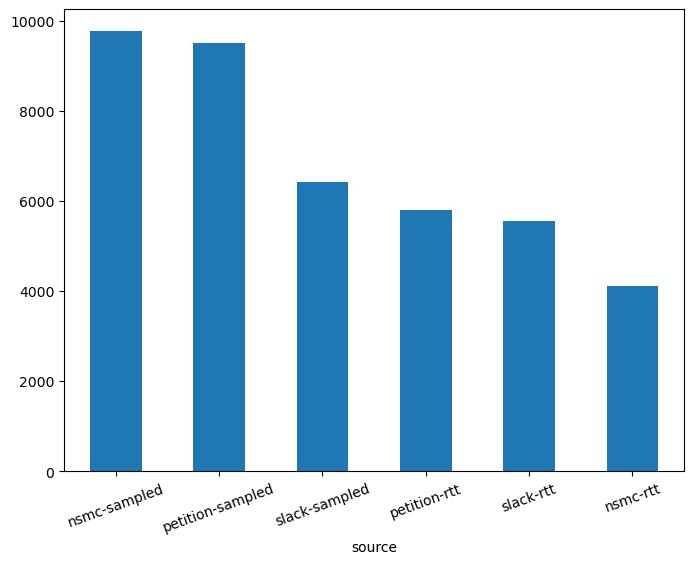

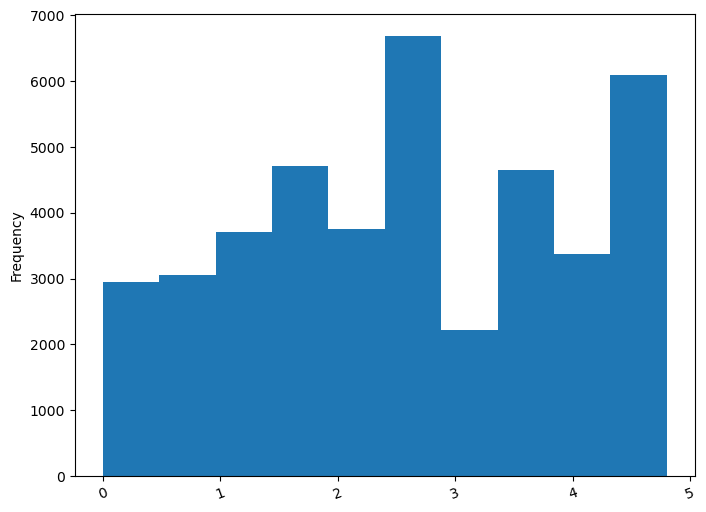

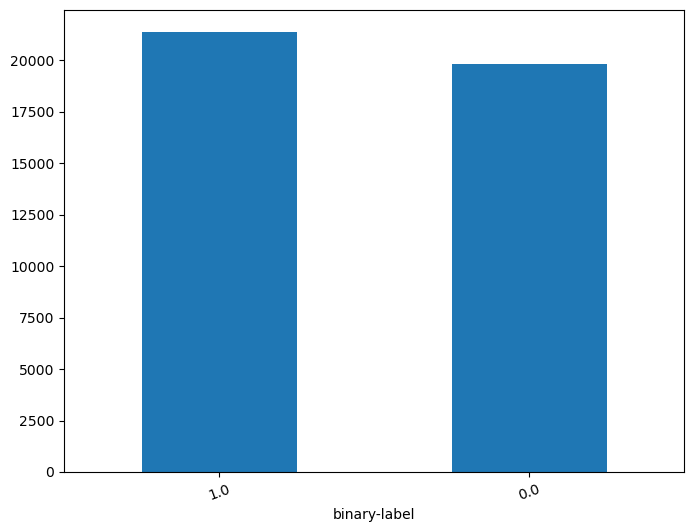

In [276]:
draw_graph(augmented_df_sr)